<a href="https://colab.research.google.com/github/Ayon1113/akram-uddin-week-03-data-visualization-notebook/blob/main/akram_uddin_movie_ratings_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akram Uddin

Option B

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movie_ratings.csv")

In [3]:
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


In [5]:
df.describe()

,user_id,movie_id,rating,age,year,decade,rating_year
count,212595.000000,212595.000000,212595.000000,212595.000000,212559.000000,212559.000000,212595.000000
mean,464.525643,390.545173,3.551048,32.771382,1987.563105,1982.602148,1997.469282
std,267.294662,312.312060,1.119645,11.452661,13.990727,13.687463,0.499057
min,1.000000,1.000000,1.000000,7.000000,1922.000000,1920.000000,1997.000000
25%,255.000000,164.000000,3.000000,24.000000,1984.000000,1980.000000,1997.000000
50%,450.000000,293.000000,4.000000,30.000000,1994.000000,1990.000000,1997.000000
75%,688.000000,568.000000,4.000000,40.000000,1996.000000,1990.000000,1998.000000
max,943.000000,1682.000000,5.000000,73.000000,1998.000000,1990.000000,1998.000000


The graph below shows the number of ratings given for each of the 11 genres in our dataset. Drama seems to be by and far the most popular genre of movie, after that apart from a few bumps its a relatively steady decline.

<Axes: title={'center': 'Breakdown of Genres for Rated Movies'}, xlabel='genres', ylabel='Number of Ratings'>

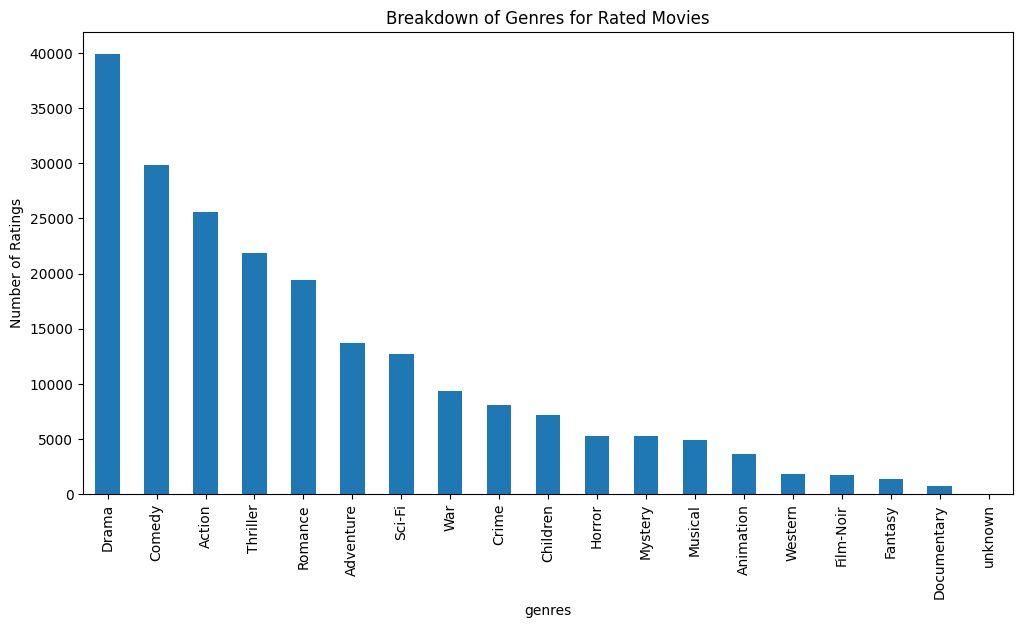

In [6]:
df['genres'].value_counts().plot(kind='bar', figsize=(12,6), title="Breakdown of Genres for Rated Movies",ylabel = "Number of Ratings")


Let me check what "unknown" genre refers to

In [7]:
df['genres'].value_counts()

,count
genres,
Drama,39895
Comedy,29832
Action,25589
Thriller,21872
Romance,19461
Adventure,13753
Sci-Fi,12730
War,9398
Crime,8055


In [8]:
print(df[df['genres'] == 'unknown'])

        user_id  movie_id  rating            timestamp  age gender  \
4587        130       267       5  1997-10-02 14:07:19   20      M   
7990          5       267       4  1997-09-30 15:57:44   33      F   
15290       268       267       3  1997-10-01 21:41:17   24      M   
18067       181      1373       1  1997-11-08 04:07:32   26      M   
26357       297       267       3  1997-09-28 01:12:19   29      F   
31160       319       267       4  1997-10-01 12:08:10   38      M   
32286         1       267       4  1997-10-01 08:02:35   24      M   
103980      532       267       3  1997-09-28 10:09:08   20      M   
198811      833       267       1  1997-09-30 21:41:09   34      M   
211972      422       267       4  1997-09-30 21:46:26   26      M   

           occupation zip_code                title    year  decade   genres  \
4587             none    60115              unknown     NaN     NaN  unknown   
7990            other    15213              unknown     NaN     NaN  

Seems like nonesense, and it might skew the upcoming plots, so I will drop the rows with genre set as "unknown"

In [9]:
df.drop(df[df['genres'] == 'unknown'].index, inplace = True)

In [10]:
df['genres'].value_counts()

,count
genres,
Drama,39895
Comedy,29832
Action,25589
Thriller,21872
Romance,19461
Adventure,13753
Sci-Fi,12730
War,9398
Crime,8055


Although noticeable, the difference in the average rating for each genre is not very significiant as they are all in the range of 3.2 <= average rating < 4. And funnily enough although drama was by the far the most popular genre to rate, its third place in terms of the actual average rating, whereas film-noir which wasn't very popular at all is actually #1.

Comedy and action although at the head of the popularity chart, were at the tail end of the average rating chart.

<Axes: title={'center': 'Average Rating for Each Genre'}, xlabel='genres', ylabel='Average Rating'>

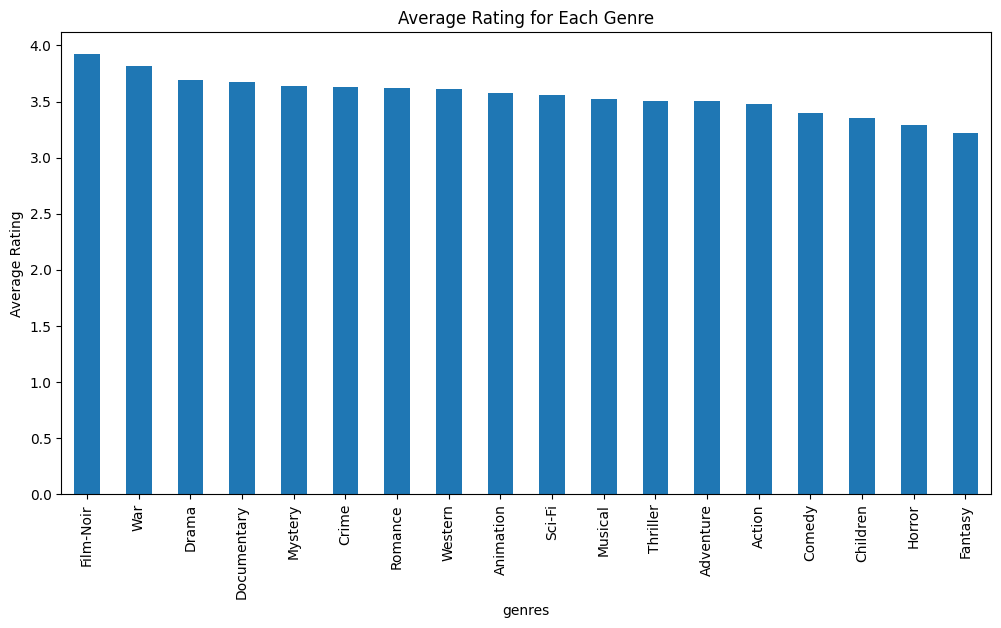

In [11]:
df.groupby('genres')['rating'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Average Rating for Each Genre",ylabel = "Average Rating")

In [12]:
df.groupby('genres')['rating'].mean().sort_values(ascending=False)

,rating
genres,
Film-Noir,3.921523
War,3.815812
Drama,3.687379
Documentary,3.672823
Mystery,3.638132
Crime,3.632278
Romance,3.621705
Western,3.613269
Animation,3.576699


We can see early on in the 1920s the average rating was very low but then shot up and then the average rating had somewhat stabilized into a certain range (just below 4.0) from around 1930-1980 ,though it had its all time peak with an average rating of 4.4 in 1943.

But then from 1980 onward we see a general decline as the trend. Did movies get worse? I mean it's possible but I'm led to believe that its moreso that as time went, there were more options for entertainment than ever before, and because of that people's expectations got higher and higher leaving the average ratings to get lower and lower.

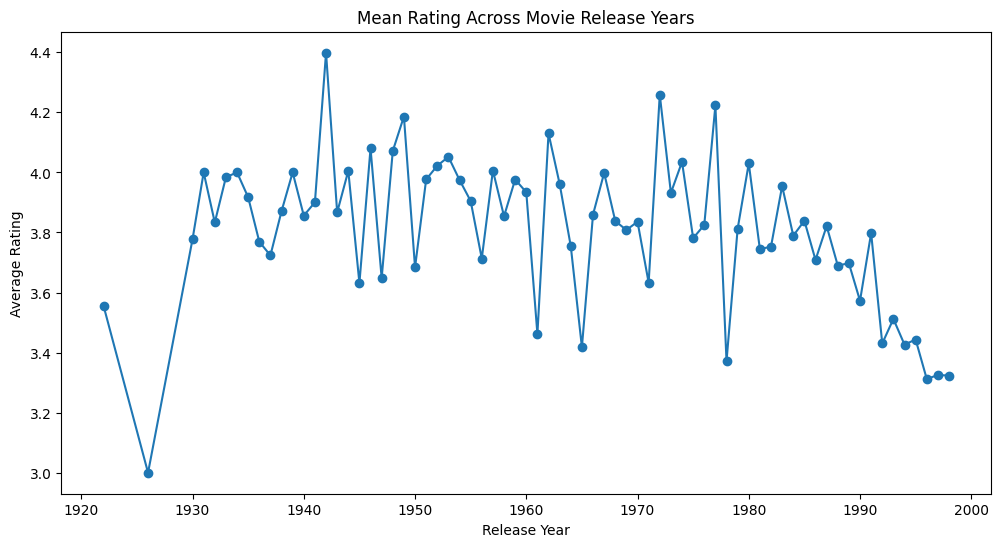

In [13]:
df.groupby('year')['rating'].mean().plot(
    kind='line',
    marker='o',
    figsize=(12,6),
    title="Mean Rating Across Movie Release Years",
    ylabel="Average Rating",
    xlabel="Release Year"
)
plt.show()

Seems that the only difference between the top 5 movies with at least 50 ratings and 150 ratings is 5th place. Although the audience of Wallace & Gromit is small they certainly seem to love it.

In [33]:
movies = df.groupby(['title'])['rating'].agg(['mean','count'])

In [34]:
best_50 = movies[movies['count'] >= 50].sort_values('mean', ascending=False).head(5)

best_150 = movies[movies['count'] >= 150].sort_values('mean', ascending=False).head(5)

print("Top 5 Movies (≥50 ratings):\n", best_50, "\n")
print("Top 5 Movies (≥150 ratings):\n", best_150)

Top 5 Movies (≥50 ratings):
                                                         mean  count
title                                                              
Close Shave, A (1995)                               4.491071    336
Schindler's List (1993)                             4.466443    596
Wrong Trousers, The (1993)                          4.466102    236
Casablanca (1942)                                   4.456790    729
Wallace & Gromit: The Best of Aardman Animation...  4.447761     67 

Top 5 Movies (≥150 ratings):
                                       mean  count
title                                            
Close Shave, A (1995)             4.491071    336
Schindler's List (1993)           4.466443    596
Wrong Trousers, The (1993)        4.466102    236
Casablanca (1942)                 4.456790    729
Shawshank Redemption, The (1994)  4.445230    283
